In [17]:
import utils.optlib as opt
import numpy as np
import plotly.graph_objects as go

### Creating American Put Option and grid

In [18]:
# setting the underlying
stock = opt.Underlying(price=65,
                       volatility=0.3,
                       interest=0.0)

# creating the American Put option
AmPut = opt.Option(underlying=stock,
                   style="American",
                   call=False,
                   strike=50)

# creating the grid and adding option's parameters
grid = opt.Grid(xSteps=120,
                tSteps=50,
                xLeft=-3.0,
                xRight=1.0)
grid.addOption(AmPut)
print("Curant number", grid.lamda)
# setting boundary conditions
grid.setBoundsPut()

0.8099999999999999


### Brennan-Schwartz algorythm implementation
### Plotting grid with Early execution Curve


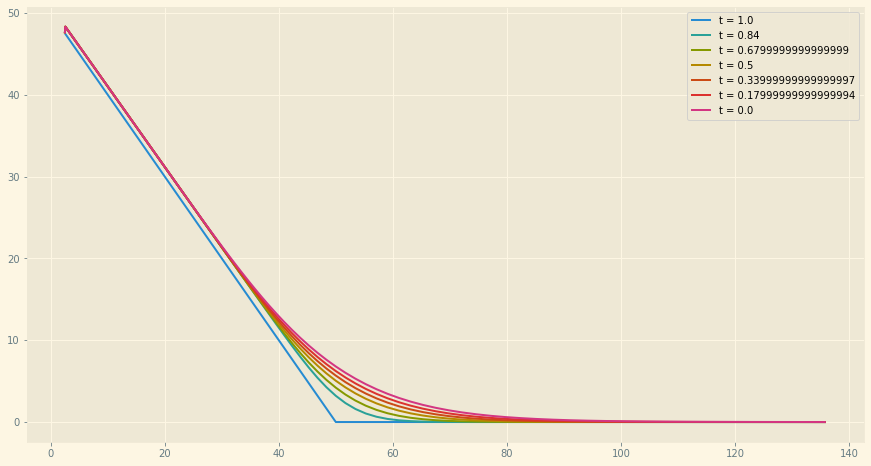

In [19]:
# valuating the option using brennan schwartz algorythm
grid.BrennanSchwartz()

# transforming coordinates
grid.toNormal(True)
grid.plot(7, False)

### Valuating European Put option with the same Underlying, Strike and Maturity

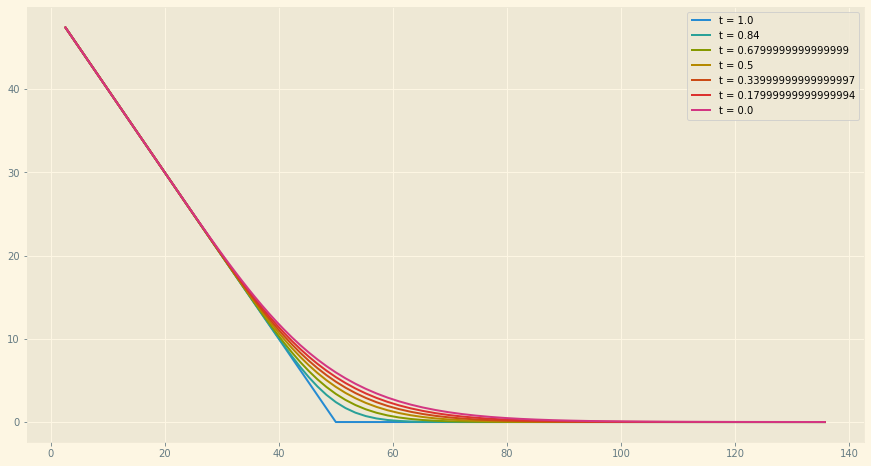

In [20]:
EuPut = opt.Option(stock, "European", False, 50)
# creating the grid and adding option's parameters
grid2 = opt.Grid(120, 50, -3.0, 1.0)
grid2.addOption(EuPut)
grid2.valuateBSM()
grid2.plot(7, False)

### Plotting the difference between American and European

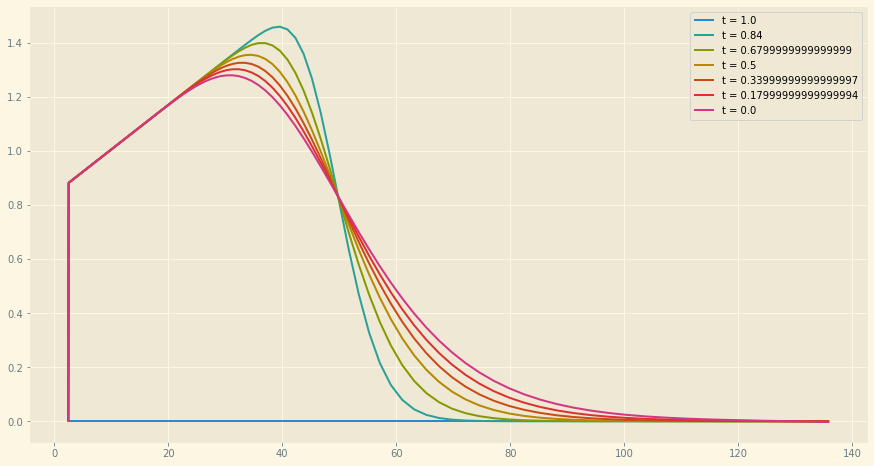

In [21]:
grid2.net = grid.net - grid2.net
grid2.plot(7, False)

### Calculating Vega $ dV/d\sigma $ via Finite Differences

0.8099999999999999


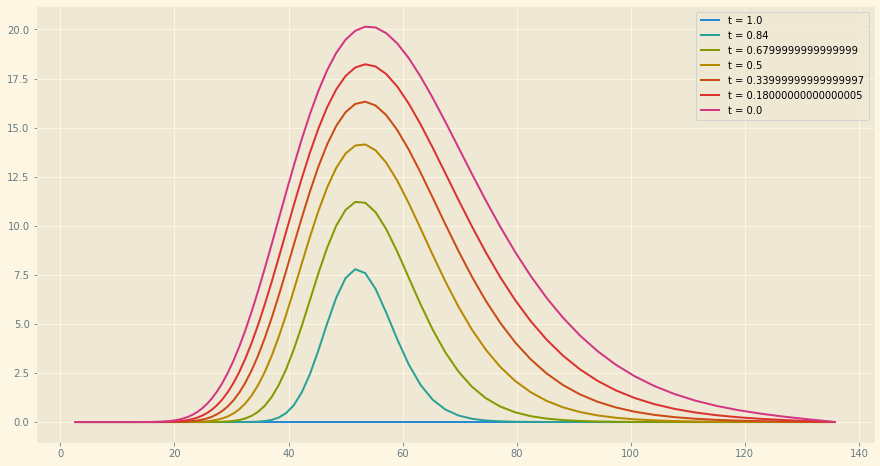

In [22]:
grid1 = opt.Grid(120, 50, -3.0, 1.0)
grid1.addOption(AmPut)
print(grid1.lamda)
grid1.setBoundsPut()
grid1.BrennanSchwartz()
grid1.toNormal(True)
initial = grid1.net.copy()

shift_percent = 1
shift = shift_percent * grid.option.Underlying.volatility / 100
grid2 = opt.Grid(120, 50, -3.0, 1.0)
AmPut.Underlying.volatility += shift
grid2.addOption(AmPut)
grid2.setBoundsPut()
grid2.BrennanSchwartz()
grid2.toNormal(True)
shifted = grid2.net.copy()

diff = np.subtract(shifted, initial)
vega = diff / shift

grid2.net = vega
grid2.plot(7, False)

# surface = go.Surface(z=vega, x=grid.tGrid, y=grid.xGrid)
# fig = go.Figure([surface])
# fig.update_layout(title='V(S,t)', autosize=False,
#                   width=800, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))
# fig.show()

### Vega via BSM

0.8099999999999999


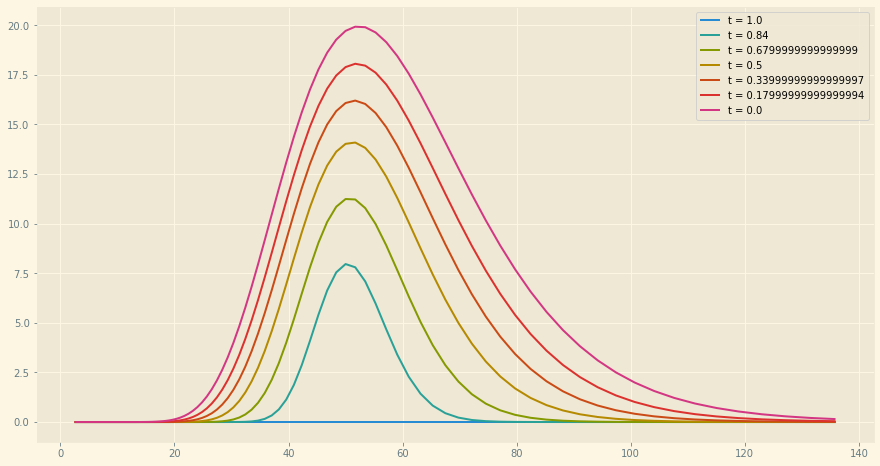

In [23]:
grid1 = opt.Grid(120, 50, -3.0, 1.0)
print(grid.lamda)
grid1.addOption(AmPut)
grid1.valuateBSM()
initial = grid1.net.copy()

shift_percent = 1
shift = shift_percent * grid.option.Underlying.volatility / 100
grid2 = opt.Grid(120, 50, -3.0, 1.0)
AmPut.Underlying.volatility += shift
grid2.addOption(AmPut)
grid2.valuateBSM()
shifted = grid2.net.copy()

diff = np.subtract(shifted, initial)
vega2 = diff / shift

grid2.net = vega2
grid2.plot(7, False)

# surface = go.Surface(z=vega2, x=grid.tGrid, y=grid.xGrid)
# fig = go.Figure([surface])
# fig.update_layout(title='V(S,t)', autosize=False,
#                   width=800, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))
# fig.show()